In [99]:
import seaborn as sns
sns.set_style('white')

In [100]:
printfig = False

In [101]:
def get_month(index):
    return index.month

In [102]:
def get_mowy(index):
    '''get month of water year'''
    month = index.month
    if month == 10:
        return 1
    if month == 11:
        return 2
    if month == 12:
        return 3
    if month == 1:
        return 4
    if month == 2:
        return 5
    if month == 3:
        return 6
    if month == 4:
        return 7
    if month == 5:
        return 8
    if month == 6:
        return 9
    if month == 7:
        return 10
    if month == 8:
        return 11
    if month == 9:
        return 12

In [103]:
months_as_water_year = ['10','11','12','1','2','3','4','5','6','7','8','9']

## First look at Change in Land Cover and Change in Forcings Together

In [115]:
df = pd.read_pickle('./data/experiment_results_v5.pcl')

In [116]:
df.name.unique()

array(['CLC_CP_CT', 'FLC_LP_FT', 'FLC_MP_FT', 'CLC_LP_CT', 'CLC_MP_CT',
       'CLC_CP_FT', 'CLC_MP_FT', 'CLC_LP_FT'], dtype=object)

In [117]:
df.columns

Index([u'index', u'track', u'scenario', u'year', u'decade', u'name', u'idx',
       u'R_P', u'LAI', u'R_Pmin', u'R_Pmax', u'Q', u'L', u'P', u'SWE', u'ET',
       u'leakage', u'streamflow', u'et', u'trans', u'snow_sub', u'snowfall',
       u'precip', u'evap', u'root_storage', u'krumlai', u'krumweight'],
      dtype='object')

In [118]:
cont = df.loc[df.decade == 0]

In [119]:
len(cont)

6

In [11]:
len(df)

126

In [12]:
LP = df.loc[(df.track=='PGW_LP') & (df.name == 'FLC_LP_FT')]
MP = df.loc[(df.track=='PGW_MP') & (df.name == 'FLC_MP_FT')]

In [13]:
LP = pd.concat([cont,LP]).groupby('year')
MP = pd.concat([cont,MP]).groupby('year')

In [14]:
LP.mean().columns

Index([u'index', u'scenario', u'decade', u'idx', u'R_P', u'LAI', u'R_Pmin',
       u'R_Pmax', u'Q', u'L', u'P', u'SWE', u'ET', u'leakage', u'krumlai',
       u'krumweight'],
      dtype='object')

In [15]:
MP.mean().R_P.round(2)

year
2000    0.11
2010    0.12
2020    0.13
2030    0.13
2040    0.13
2050    0.12
2060    0.13
2070    0.12
2080    0.12
2090    0.11
2100    0.12
Name: R_P, dtype: float64

In [16]:
LP.mean().R_P.round(2)

year
2000    0.11
2010    0.12
2020    0.12
2030    0.12
2040    0.12
2050    0.13
2060    0.13
2070    0.12
2080    0.12
2090    0.13
2100    0.13
Name: R_P, dtype: float64

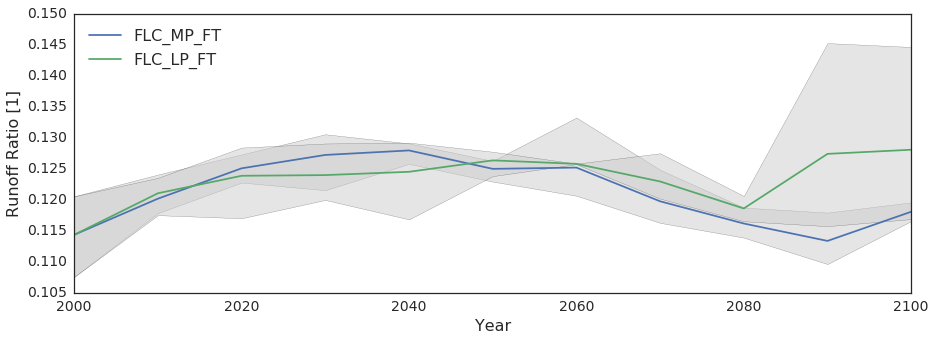

In [308]:
fig = plt.figure(figsize=(15,5))

plt.plot(MP.mean().R_P, label='FLC_MP_FT')
plt.fill_between(MP.min().index,MP.min().R_P,MP.max().R_P,facecolor='0.8',alpha=0.5)
plt.plot(LP.mean().R_P, label='FLC_LP_FT')
plt.fill_between(LP.min().index,LP.min().R_P,LP.max().R_P,facecolor='0.8',alpha=0.5)
plt.ylabel('Runoff Ratio [1]', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.legend(loc='upper left', fontsize=16)
ax = plt.gca()
[tick.label.set_fontsize(14) for tick in ax.xaxis.get_major_ticks()];
[tick.label.set_fontsize(14) for tick in ax.yaxis.get_major_ticks()];
if printfig: plt.savefig('./figures/experiment_runoff_ratio_v2.png',dpi=300,bbox_inches='tight')

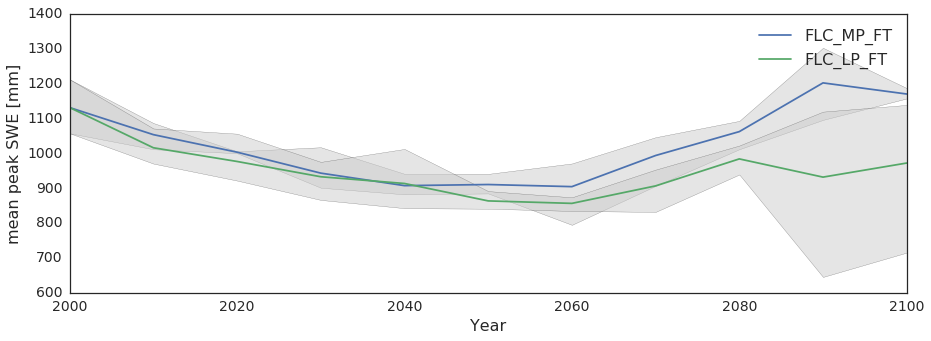

In [201]:
fig = plt.figure(figsize=(15,5))

plt.plot(MP.mean().SWE, label='FLC_MP_FT')
plt.fill_between(MP.min().index,MP.min().SWE,MP.max().SWE,facecolor='0.8',alpha=0.5)
plt.plot(LP.mean().SWE, label='FLC_LP_FT')
plt.fill_between(LP.min().index,LP.min().SWE,LP.max().SWE,facecolor='0.8',alpha=0.5)
plt.ylabel('mean peak SWE [mm]', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.legend(loc='upper right', fontsize=16)
ax = plt.gca()
[tick.label.set_fontsize(14) for tick in ax.xaxis.get_major_ticks()];
[tick.label.set_fontsize(14) for tick in ax.yaxis.get_major_ticks()];
if printfig: plt.savefig('./figures/experiment_mean_peakSWE_v2.png',dpi=300,bbox_inches='tight')

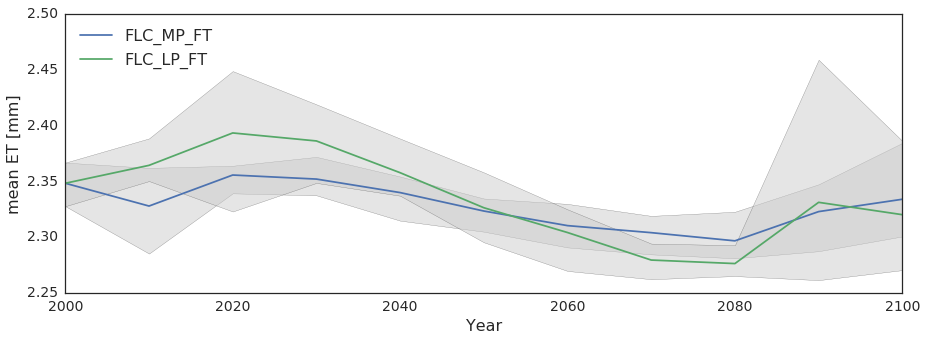

In [202]:
fig = plt.figure(figsize=(15,5))

plt.plot(MP.mean().ET, label='FLC_MP_FT')
plt.fill_between(MP.min().index,MP.min().ET,MP.max().ET,facecolor='0.8',alpha=0.5)
plt.plot(LP.mean().ET, label='FLC_LP_FT')
plt.fill_between(LP.min().index,LP.min().ET,LP.max().ET,facecolor='0.8',alpha=0.5)
plt.ylabel('mean ET [mm]', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.legend(loc='upper left', fontsize=16)
ax = plt.gca()
[tick.label.set_fontsize(14) for tick in ax.xaxis.get_major_ticks()];
[tick.label.set_fontsize(14) for tick in ax.yaxis.get_major_ticks()];
if printfig: plt.savefig('./figures/experiment_mean_ET_v2.png',dpi=300,bbox_inches='tight')

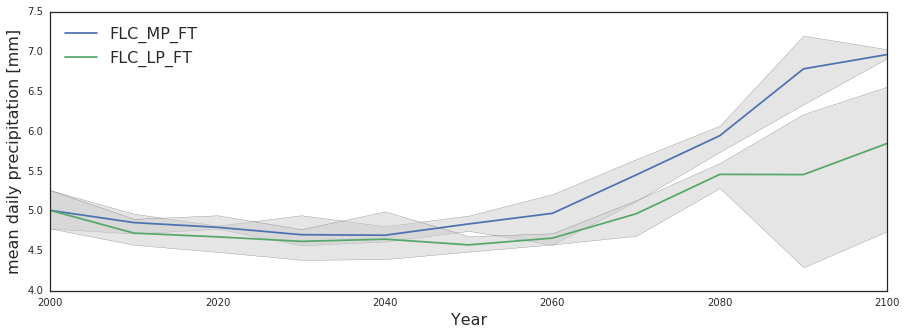

In [203]:
fig = plt.figure(figsize=(15,5))

plt.plot(MP.mean().P, label='FLC_MP_FT')
plt.fill_between(MP.min().index,MP.min().P,MP.max().P,facecolor='0.8',alpha=0.5)
plt.plot(LP.mean().P, label='FLC_LP_FT')
plt.fill_between(LP.min().index,LP.min().P,LP.max().P,facecolor='0.8',alpha=0.5)
plt.ylabel('mean daily precipitation [mm]', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.legend(loc='upper left', fontsize=16)
if printfig: plt.savefig('./figures/experiment_mean_P_v2.png',dpi=300,bbox_inches='tight')

In [204]:
QP_change_mean = pd.DataFrame()
QP_change_min = pd.DataFrame()
QP_change_max = pd.DataFrame()

In [205]:
control = MP.mean().loc[MP.mean().index==2000]['R_P'].as_matrix()[0]
QP_change_mean['PGW_MP']=((MP.mean()['R_P']/control)*100-100).round(1)
control = LP.mean().loc[LP.mean().index==2000]['R_P'].as_matrix()[0]
QP_change_mean['PGW_LP']=((LP.mean()['R_P']/control)*100-100).round(1)

In [206]:
control = MP.min().loc[MP.min().index==2000]['R_P'].as_matrix()[0]
QP_change_min['PGW_MP']=((MP.min()['R_P']/control)*100-100).round(1)
control = LP.min().loc[LP.min().index==2000]['R_P'].as_matrix()[0]
QP_change_min['PGW_LP']=((LP.min()['R_P']/control)*100-100).round(1)

In [207]:
control = MP.max().loc[MP.max().index==2000]['R_P'].as_matrix()[0]
QP_change_max['PGW_MP']=((MP.max()['R_P']/control)*100-100).round(1)
control = LP.max().loc[LP.max().index==2000]['R_P'].as_matrix()[0]
QP_change_max['PGW_LP']=((LP.max()['R_P']/control)*100-100).round(1)

In [208]:
QP_change_mean

,PGW_MP,PGW_LP
year,,
2000,0.0,0.0
2010,5.1,5.9
2020,9.4,8.3
2030,11.3,8.4
2040,11.9,8.9
2050,9.3,10.5
2060,9.5,10.0
2070,4.7,7.5
2080,1.6,3.7


In [209]:
QP_change_min

,PGW_MP,PGW_LP
year,,
2000,0.0,0.0
2010,9.5,9.2
2020,14.1,8.8
2030,13.0,11.5
2040,16.9,8.6
2050,14.3,15.1
2060,12.2,16.9
2070,8.1,11.7
2080,5.9,8.3


In [210]:
QP_change_max

,PGW_MP,PGW_LP
year,,
2000,0.0,0.0
2010,2.9,2.5
2020,5.6,6.5
2030,8.3,7.1
2040,7.1,7.2
2050,4.7,6.0
2060,10.5,4.4
2070,3.5,5.8
2080,-1.5,0.0


### Compute Annual Hydrographs

In [105]:
strt = '1993-10-1'
nd = '2013-9-30'

In [106]:
dates = pd.date_range(strt,nd)
dowy = dates.map(rut.DOWY)

In [124]:
LP = df.loc[(df.track=='PGW_LP') & (df.name == 'FLC_LP_FT')]
MP = df.loc[(df.track=='PGW_MP') & (df.name == 'FLC_MP_FT')]
tmp = pd.concat([LP,MP,cont])
tmp.reset_index(inplace=True)

In [125]:
dat = pd.DataFrame()
for i in range(len(tmp)):
    out = pd.DataFrame()
    
    # populate the DF
    out['sf'] = tmp.streamflow[i]
    out['et'] = tmp.et[i]
    out['trans'] = tmp.trans[i]
    out['snow_sub'] = tmp.snow_sub[i]
    out['snowfall'] = tmp.snowfall[i]
    out['precip'] = tmp.precip[i]
    out['evap'] = tmp.evap[i]
    out['leakage'] = tmp.leakage[i]
    out['root_storage'] = tmp.root_storage[i]
    
    # resample the data frame to monthly
    out.index = pd.DatetimeIndex(dates)
    out = out.resample('M').sum()
    out['month'] = out.index.map(get_mowy)
    
    # add the ID variables
    out['name'] = tmp.name[i]
    out['year'] = tmp.year[i]
    out['decade'] = tmp.decade[i]
    out['track'] = tmp.track[i]
    out['scenario'] = tmp.scenario[i]
    
    dat = pd.concat([dat,out])

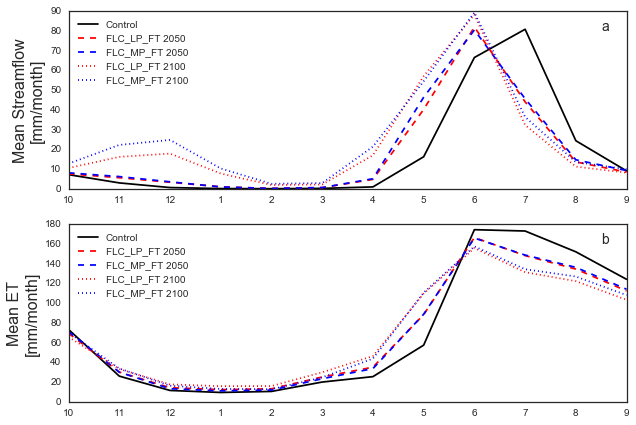

In [65]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

plt.sca(ax1)
dat.loc[dat.year==2000].groupby('month').mean()['sf'].plot(c='k', label = 'Control',ax=ax1)

dat.loc[(dat.name=='FLC_LP_FT') & (dat.decade==5)].groupby('month').mean()['sf'].plot(label='FLC_LP_FT 2050',
                                                                        c='r',ls='--',ax=ax1)
dat.loc[(dat.name=='FLC_MP_FT') & (dat.decade==5)].groupby('month').mean()['sf'].plot(label='FLC_MP_FT 2050',
                                                                        c='b',ls='--',ax=ax1)

dat.loc[(dat.name=='FLC_LP_FT') & (dat.decade==10)].groupby('month').mean()['sf'].plot(label='FLC_LP_FT 2100',
                                                                        c='r',ls=':',ax=ax1)
dat.loc[(dat.name=='FLC_MP_FT') & (dat.decade==10)].groupby('month').mean()['sf'].plot(label='FLC_MP_FT 2100',
                                                                        c='b',ls=':',ax=ax1)
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0)
plt.ylabel('Mean Streamflow\n[mm/month]', fontsize = 16)
plt.xlabel('', fontsize = 16)
plt.legend(loc='upper left')
plt.text(11.5,80,'a',fontsize=14)

plt.sca(ax2)
dat.loc[dat.year==2000].groupby('month').mean()['et'].plot(c='k', label = 'Control',ax=ax2)

dat.loc[(dat.name=='FLC_LP_FT') & (dat.decade==5)].groupby('month').mean()['et'].plot(label='FLC_LP_FT 2050',
                                                                        c='r',ls='--',ax=ax2)
dat.loc[(dat.name=='FLC_MP_FT') & (dat.decade==5)].groupby('month').mean()['et'].plot(label='FLC_MP_FT 2050',
                                                                        c='b',ls='--',ax=ax2)

dat.loc[(dat.name=='FLC_LP_FT') & (dat.decade==10)].groupby('month').mean()['et'].plot(label='FLC_LP_FT 2100',
                                                                        c='r',ls=':',ax=ax2)
dat.loc[(dat.name=='FLC_MP_FT') & (dat.decade==10)].groupby('month').mean()['et'].plot(label='FLC_MP_FT 2100',
                                                                        c='b',ls=':',ax=ax2)
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0)
plt.ylabel('Mean ET\n[mm/month]', fontsize = 16)
plt.xlabel('', fontsize = 16)
plt.legend(loc='upper left')
plt.text(11.5,160,'b',fontsize=14)
if printfig: plt.savefig('./figures/FLC_sf_et_monthly.png',dpi=300,bbox_inches='tight')
if printfig: plt.savefig('./figures/FLC_sf_et_monthly.pdf',bbox_inches='tight')

In [122]:
def make_table(var):
    table = pd.DataFrame()
    
    table['Control'] = dat.loc[(dat.year==2000) & (dat.name == 'CLC_CP_CT')].groupby('month').mean()[var]
    for decade in np.arange(0,11):
        #make year
        year = (decade*10) + 2000
        
        # pull the data into the data frame
        table['FLC_LP_FT_%s'%year] = dat.loc[(dat.name=='FLC_LP_FT') & (dat.decade==decade)].groupby('month').mean()[var]
        table['FLC_MP_FT_%s'%year] = dat.loc[(dat.name=='FLC_MP_FT') & (dat.decade==decade)].groupby('month').mean()[var]
        
        # compute changes
        table['delta_MP_%s'%year] = table['FLC_MP_FT_%s'%year]-table['Control']
        table['delta_LP_%s'%year] = table['FLC_LP_FT_%s'%year]-table['Control']
        table['percent_MP_%s'%year] = (table['delta_MP_%s'%year]/table['Control'])*100.
        table['percent_LP_%s'%year] = (table['delta_LP_%s'%year]/table['Control'])*100.
        

    #del table['Control']; del table['FLC_LP_FT_2050']; del table['FLC_MP_FT_2050'];
    #del table['FLC_LP_FT_2100']; del table['FLC_MP_FT_2100'];
    return table

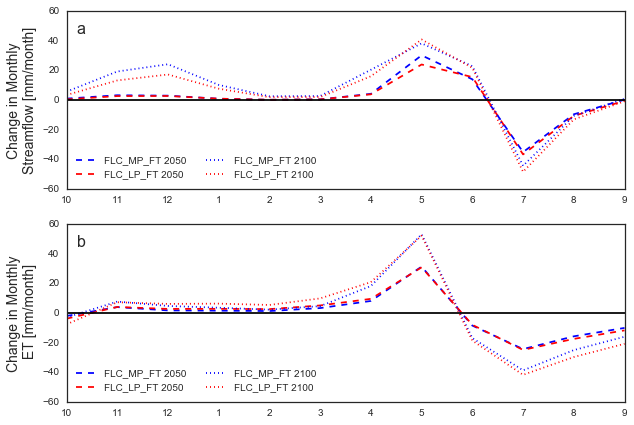

In [67]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

table = make_table('sf')

plt.sca(ax1)
year = '2050'
table[['delta_MP_%s'%year,'delta_LP_%s'%year]].plot(color=['b','r'],ls='--',ax=ax1)
year = '2100'
table[['delta_MP_%s'%year,'delta_LP_%s'%year]].plot(color=['b','r'],ls=':',ax=ax1)
plt.legend(['FLC_MP_FT 2050','FLC_LP_FT 2050','FLC_MP_FT 2100','FLC_LP_FT 2100'],ncol=2,loc='lower left')
plt.ylim(-60,60)
plt.axhline(0,color='k')
plt.ylabel('Change in Monthly\nStreamflow [mm/month]',fontsize=14)
plt.xlabel('')
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0)
plt.text(1.2,45,'a',fontsize=16)

table = make_table('et')

plt.sca(ax2)
year = '2050'
table[['delta_MP_%s'%year,'delta_LP_%s'%year]].plot(color=['b','r'],ls='--',ax=ax2)
year = '2100'
table[['delta_MP_%s'%year,'delta_LP_%s'%year]].plot(color=['b','r'],ls=':',ax=ax2)
plt.legend(['FLC_MP_FT 2050','FLC_LP_FT 2050','FLC_MP_FT 2100','FLC_LP_FT 2100'],ncol=2,loc='lower left')
#plt.ylim(-1.7,1.7)
plt.axhline(0,color='k')
plt.ylabel('Change in Monthly\n ET [mm/month]',fontsize=14)
plt.xlabel('')
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0)
plt.text(1.2,45,'b',fontsize=16)

if printfig: plt.savefig('./figures/FLC_absolute_sf_et_change.png',dpi=300,bbox_inches='tight')
if printfig: plt.savefig('./figures/FLC_absolute_sf_et_change.pdf',bbox_inches='tight')

In [131]:
table

,Control,FLC_LP_FT_2000,FLC_MP_FT_2000,delta_MP_2000,delta_LP_2000,percent_MP_2000,percent_LP_2000,FLC_LP_FT_2010,FLC_MP_FT_2010,delta_MP_2010,...,delta_MP_2090,delta_LP_2090,percent_MP_2090,percent_LP_2090,FLC_LP_FT_2100,FLC_MP_FT_2100,delta_MP_2100,delta_LP_2100,percent_MP_2100,percent_LP_2100
month,,,,,,,,,,,,,,,,,,,,,
1,1196.172127,NaN,NaN,NaN,NaN,NaN,NaN,1253.200719,1304.262614,108.090487,...,387.880964,147.893526,32.426852,12.363900,1351.420812,1624.849140,428.677013,155.248685,35.837402,12.978791
2,1255.696153,NaN,NaN,NaN,NaN,NaN,NaN,1320.672061,1373.356833,117.660681,...,413.873838,173.796784,32.959712,13.840672,1446.587010,1710.641845,454.945692,190.890857,36.230556,15.201994
3,1291.830576,NaN,NaN,NaN,NaN,NaN,NaN,1359.960595,1413.402056,121.571480,...,527.765656,264.306399,40.854092,20.459835,1596.604529,1871.860202,580.029626,304.773953,44.899822,23.592409
4,1292.878587,NaN,NaN,NaN,NaN,NaN,NaN,1360.552625,1413.200780,120.322193,...,572.859536,300.498239,44.308842,23.242572,1650.586917,1938.070882,645.192295,357.708330,49.903549,27.667589
5,1173.053974,NaN,NaN,NaN,NaN,NaN,NaN,1233.439034,1280.853919,107.799945,...,550.663000,292.017609,46.942682,24.893791,1533.098510,1810.306997,637.253024,360.044537,54.324271,30.692922
6,1301.452263,NaN,NaN,NaN,NaN,NaN,NaN,1369.894311,1422.713726,121.261462,...,697.583214,374.115665,53.600369,28.746015,1782.953089,2133.220249,831.767985,481.500825,63.910756,36.997194
7,1372.451603,NaN,NaN,NaN,NaN,NaN,NaN,1459.387702,1513.163162,140.711559,...,981.596618,665.717204,71.521401,48.505696,2150.281800,2433.612528,1061.160925,777.830197,77.318641,56.674508
8,2031.272024,NaN,NaN,NaN,NaN,NaN,NaN,2113.002794,2151.629524,120.357500,...,-191.291556,-45.376677,-9.417328,-2.233904,1875.658844,1735.230164,-296.041861,-155.613180,-14.574210,-7.660874
9,1303.938769,NaN,NaN,NaN,NaN,NaN,NaN,1259.073981,1228.503748,-75.435022,...,-322.991190,-208.043465,-24.770426,-15.955003,1098.699395,1023.246916,-280.691854,-205.239375,-21.526460,-15.739955


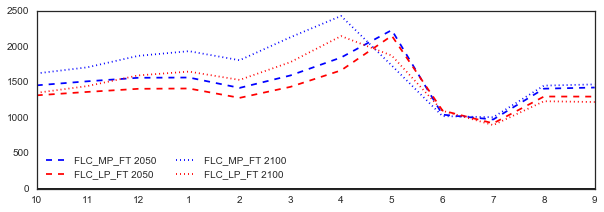

In [132]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(211)

table = make_table('root_storage')

plt.sca(ax1)
year = '2050'
table[['FLC_MP_FT_%s'%year,'FLC_LP_FT_%s'%year]].plot(color=['b','r'],ls='--',ax=ax1)
year = '2100'
table[['FLC_MP_FT_%s'%year,'FLC_LP_FT_%s'%year]].plot(color=['b','r'],ls=':',ax=ax1)
plt.legend(['FLC_MP_FT 2050','FLC_LP_FT 2050','FLC_MP_FT 2100','FLC_LP_FT 2100'],ncol=2,loc='lower left')
#plt.ylim(-60,60)
plt.axhline(0,color='k')
#plt.ylabel('Change in Monthly\nStreamflow [mm/month]',fontsize=14)
plt.xlabel('')
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0);
#plt.text(1.2,45,'a',fontsize=16)

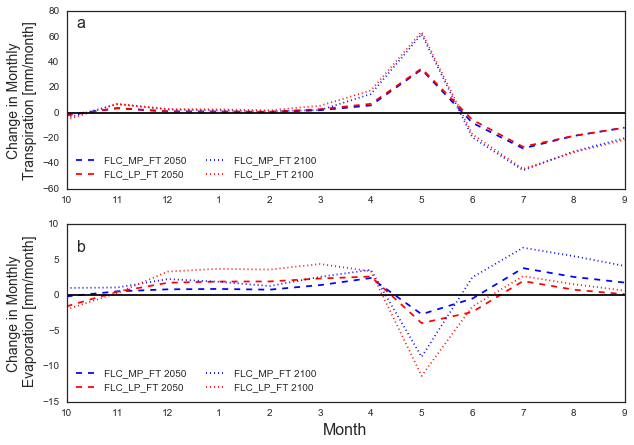

In [68]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

table = make_table('trans')

plt.sca(ax1)
year = '2050'
table[['delta_MP_%s'%year,'delta_LP_%s'%year]].plot(color=['b','r'],ls='--',ax=ax1)
year = '2100'
table[['delta_MP_%s'%year,'delta_LP_%s'%year]].plot(color=['b','r'],ls=':',ax=ax1)
plt.legend(['FLC_MP_FT 2050','FLC_LP_FT 2050','FLC_MP_FT 2100','FLC_LP_FT 2100'],ncol=2,loc='lower left')
plt.axhline(0,color='k')
plt.ylabel('Change in Monthly\nTranspiration [mm/month]',fontsize=14)
plt.xlabel('')
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0)
plt.text(1.2,67,'a',fontsize=16)

table = make_table('evap')

plt.sca(ax2)
year = '2050'
table[['delta_MP_%s'%year,'delta_LP_%s'%year]].plot(color=['b','r'],ls='--',ax=ax2)
year = '2100'
table[['delta_MP_%s'%year,'delta_LP_%s'%year]].plot(color=['b','r'],ls=':',ax=ax2)
plt.legend(['FLC_MP_FT 2050','FLC_LP_FT 2050','FLC_MP_FT 2100','FLC_LP_FT 2100'],ncol=2,loc='lower left')
plt.axhline(0,color='k')
plt.ylabel('Change in Monthly\n Evaporation [mm/month]',fontsize=14)
plt.xlabel('')
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0)
plt.text(1.2,6.2,'b',fontsize=16)
ax2.set_xlabel('Month', fontsize=16)
#printfig = True
if printfig: plt.savefig('./figures/FLC_absolute_trans_evap_change.png',dpi=300,bbox_inches='tight')
if printfig: plt.savefig('./figures/FLC_absolute_trans_evap_change.pdf',bbox_inches='tight')
#printfig = False

In [69]:
def get_year(index): return int(index.split('_')[-1])
def get_track(index): return index.split('_')[-2]

In [70]:
summary = pd.DataFrame()
summary['Streamflow'] = make_table('sf').filter(regex='delta*').sum().round(1)
summary['Evapotranspiration'] = make_table('et').filter(regex='delta*').sum().round(1)
summary['Transpiration'] = make_table('trans').filter(regex='delta*').sum().round(1)
summary['Snow Sublimation'] = make_table('snow_sub').filter(regex='delta*').sum().round(1)
summary['Snowfall'] = make_table('snowfall').filter(regex='delta*').sum().round(1)
summary['Precipitation'] = make_table('precip').filter(regex='delta*').sum().round(1)
summary['Evaporation'] = make_table('evap').filter(regex='delta*').sum().round(1)
summary['GW Loss'] = make_table('leakage').filter(regex='delta*').sum().round(1)
summary['track'] = summary.index.map(get_track)
summary['year'] = summary.index.map(get_year)

In [71]:
make_table('precip').filter(regex='Control').sum().round(1)[0]

1829.5

In [72]:
(summary.Streamflow+make_table('sf').filter(regex='Control').sum().round(0)[0]).round()

delta_MP_2000    209.0
delta_LP_2000    209.0
delta_MP_2010    213.0
delta_LP_2010    209.0
delta_MP_2020    219.0
delta_LP_2020    211.0
delta_MP_2030    218.0
delta_LP_2030    209.0
delta_MP_2040    220.0
delta_LP_2040    211.0
delta_MP_2050    221.0
delta_LP_2050    211.0
delta_MP_2060    227.0
delta_LP_2060    214.0
delta_MP_2070    238.0
delta_LP_2070    223.0
delta_MP_2080    252.0
delta_LP_2080    237.0
delta_MP_2090    281.0
delta_LP_2090    250.0
delta_MP_2100    300.0
delta_LP_2100    270.0
Name: Streamflow, dtype: float64

In [73]:
summary

,Streamflow,Evapotranspiration,Transpiration,Snow Sublimation,Snowfall,Precipitation,Evaporation,GW Loss,track,year
delta_MP_2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MP,2000
delta_LP_2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LP,2000
delta_MP_2010,4.2,-7.5,-11.3,-2.3,-77.0,-56.0,3.8,-41.0,MP,2010
delta_LP_2010,-0.1,5.9,2.3,-2.0,-116.2,-104.2,3.5,-90.4,LP,2010
delta_MP_2020,10.2,2.7,-4.0,-4.6,-121.6,-77.7,6.7,-68.4,MP,2020
delta_LP_2020,2.4,16.5,12.1,-5.0,-150.5,-121.4,4.3,-112.8,LP,2020
delta_MP_2030,9.5,1.4,-6.8,-8.1,-177.4,-111.5,8.2,-99.2,MP,2030
delta_LP_2030,0.1,13.8,9.3,-8.1,-187.8,-142.1,4.5,-127.6,LP,2030
delta_MP_2040,10.6,-3.1,-12.5,-11.2,-205.1,-113.9,9.5,-104.6,MP,2040
delta_LP_2040,2.0,3.5,-2.0,-10.7,-197.8,-132.0,5.5,-105.6,LP,2040


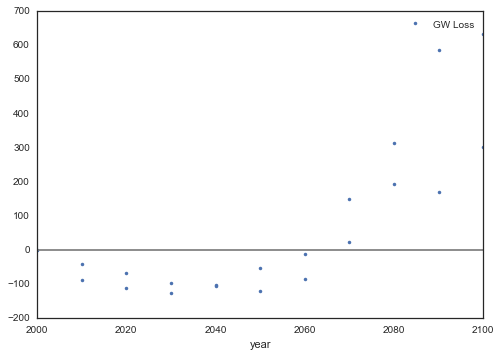

In [74]:
summary.plot('year','GW Loss',marker='.',linestyle='')
plt.axhline(0,color='0.5')

In [75]:
turb = pd.melt(summary[['Evapotranspiration','Transpiration','Evaporation','year','track',
                        'Snow Sublimation']],id_vars=['year','track'])

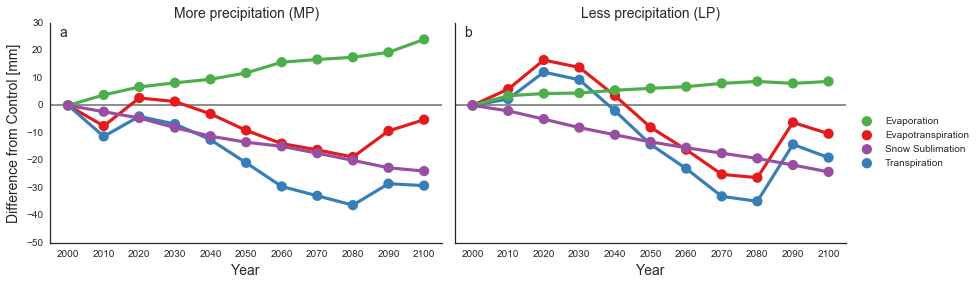

In [76]:
g = sns.FacetGrid(turb,col='track',size=4,aspect=(1.5),legend_out=True)
g = g.map(sns.pointplot,'year','value','variable',errwidth=0,palette='Set1')
g = g.add_legend()
titles = ['More precipitation (MP)','Less precipitation (LP)']
for ax,t in zip(g.axes[0],titles): 
    ax.axhline(0,color='0.5',zorder=0)
    ax.set_title(t,fontsize=14)
    ax.set_xlabel('Year',fontsize=14)
    
g.axes[0][0].text(-0.25,25,'a',fontsize=14)
g.axes[0][1].text(-0.25,25,'b',fontsize=14)
g.axes[0][0].set_ylabel('Difference from Control [mm]', fontsize = 14)
#printfig=True
if printfig: plt.savefig('./figures/annaul_vapor_fluxes.png',dpi=300,bbox_inches='tight')
if printfig: plt.savefig('./figures/annaul_vapor_fluxes.pdf',bbox_inches='tight')
#printfig=False

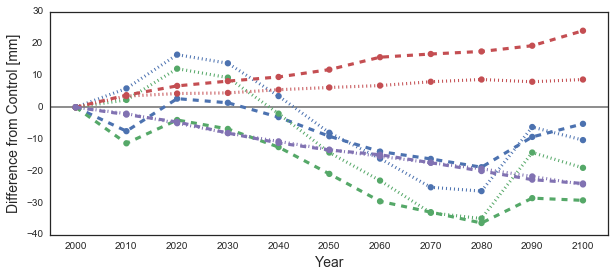

In [77]:
plt.figure(figsize=(10,4))
g = sns.pointplot('year','value',data=turb.loc[turb.track=='MP'],hue='variable',ls='track',
                  errwidth=0,linestyles=['--','--','--','--'],markers='.')

sns.pointplot('year','value',data=turb.loc[turb.track=='LP'],hue='variable',ls='track',
                  errwidth=0,linestyles=[':',':',':',':'],markers='.')
leg = g.axes.get_legend()
leg.set_title('')
new_labels = ['Evaporation + Transpiration', 'Transpiration','Evaporation','Snow Sublimation']
for t, l in zip(leg.texts, new_labels): t.set_text(l); t.set_fontsize(12)
plt.ylabel('Difference from Control [mm]', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.axhline(0,color='0.5',zorder=0)
g.legend_.remove()
#plt.draw_all()

In [51]:
summary

,sf,et,trans,snow_sub,snowfall,precip,evap,track,year
delta_MP_2010,4.2,-7.5,-11.3,-2.3,-77.0,-56.0,3.8,MP,2010
delta_LP_2010,-0.1,5.9,2.3,-2.0,-116.2,-104.2,3.5,LP,2010
delta_MP_2020,10.2,2.7,-4.0,-4.6,-121.6,-77.7,6.7,MP,2020
delta_LP_2020,2.4,16.5,12.1,-5.0,-150.5,-121.4,4.3,LP,2020
delta_MP_2030,9.5,1.4,-6.8,-8.1,-177.4,-111.5,8.2,MP,2030
delta_LP_2030,0.1,13.8,9.3,-8.1,-187.8,-142.1,4.5,LP,2030
delta_MP_2040,10.6,-3.1,-12.5,-11.2,-205.1,-113.9,9.5,MP,2040
delta_LP_2040,2.0,3.5,-2.0,-10.7,-197.8,-132.0,5.5,LP,2040
delta_MP_2050,12.0,-9.1,-20.9,-13.4,-186.6,-62.2,11.8,MP,2050
delta_LP_2050,2.3,-8.0,-14.2,-13.3,-241.5,-158.1,6.2,LP,2050


In [34]:
snowfall.filter(regex='delta*').sum().round(1)

delta_MP_2050   -186.6
delta_LP_2050   -241.5
delta_MP_2100    276.4
delta_LP_2100     10.7
dtype: float64

In [36]:
trans.filter(regex='delta*').sum().round(1)

delta_MP_2050   -20.9
delta_LP_2050   -14.2
delta_MP_2100   -29.2
delta_LP_2100   -19.0
dtype: float64

In [35]:
snow_sub.filter(regex='delta*').sum().round(1)

delta_MP_2050   -13.4
delta_LP_2050   -13.3
delta_MP_2100   -23.9
delta_LP_2100   -24.2
dtype: float64

In [33]:
precip.filter(regex='delta*').sum().round(1)

delta_MP_2050    -62.2
delta_LP_2050   -158.1
delta_MP_2100    713.9
delta_LP_2100    306.7
dtype: float64

In [32]:
evap.filter(regex='delta*').sum().round(1)

delta_MP_2050    11.8
delta_LP_2050     6.2
delta_MP_2100    24.0
delta_LP_2100     8.7
dtype: float64

In [37]:
et.filter(regex='delta*').sum().round(1)

delta_MP_2050    -9.1
delta_LP_2050    -8.0
delta_MP_2100    -5.2
delta_LP_2100   -10.3
dtype: float64

In [35]:
sf.filter(regex='delta*').sum().round(1)

delta_MP_2050    12.0
delta_LP_2050     2.3
delta_MP_2100    91.5
delta_LP_2100    61.3
dtype: float64

## Current Land Cover, More Precipitation

In [239]:
mp = df.loc[df.name=='CLC_MP_CT']
lp = df.loc[df.name=='CLC_LP_CT']
tmp = pd.concat([cont,mp,lp])
tmp.reset_index(inplace=True)

In [269]:
dat = pd.DataFrame()
for i in range(len(tmp)):
    out = pd.DataFrame()
    
    # populate the DF
    out['sf'] = tmp.streamflow[i]
    out['et'] = tmp.et[i]
    out['precip'] = tmp.precip[i]
    
    # resample the data frame to monthly
    out.index = pd.DatetimeIndex(dates)
    out = out.resample('M').sum()
    out['month'] = out.index.map(get_mowy)
    
    # add the ID variables
    out['name'] = tmp.name[i]
    out['year'] = tmp.year[i]
    out['decade'] = tmp.decade[i]
    out['track'] = tmp.track[i]
    out['scenario'] = tmp.scenario[i]
    
    dat = pd.concat([dat,out])

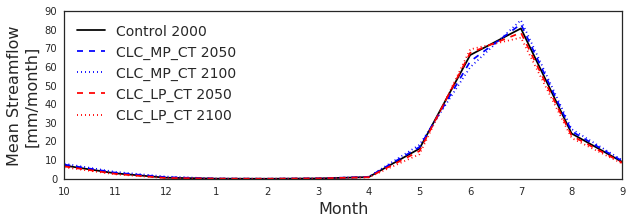

In [270]:
dat.loc[dat.decade==0].groupby(by='month').mean()['sf'].plot(c='k',ls='-', figsize=(10,3),label='Control 2000')

# more P
dat.loc[(dat.decade==5) & (dat.name == 'CLC_MP_CT')].groupby(by='month').mean()['sf'].plot(c='b',ls='--',label='CLC_MP_CT 2050')
dat.loc[(dat.decade==10) & (dat.name == 'CLC_MP_CT')].groupby(by='month').mean()['sf'].plot(c='b',ls=':',label='CLC_MP_CT 2100')

# less P
dat.loc[(dat.decade==5) & (dat.name == 'CLC_LP_CT')].groupby(by='month').mean()['sf'].plot(c='r',ls='--',label='CLC_LP_CT 2050')
dat.loc[(dat.decade==10) & (dat.name == 'CLC_LP_CT')].groupby(by='month').mean()['sf'].plot(c='r',ls=':',label='CLC_LP_CT 2100')

plt.legend(loc='upper left', fontsize = 14)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Mean Streamflow\n[mm/month]', fontsize = 16)
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0)
if printfig: plt.savefig('./figures/CLC_Precip_change.png',dpi=300,bbox_inches='tight')
if printfig: plt.savefig('./figures/CLC_Precip_change.pdf',bbox_inches='tight')

In [43]:
def make_table(var,lc,precip,temp):
    '''
    var - variable of interest
    lc - land cover specification
    precip - precipitation specification
    temp - temperature specification'''
    table = pd.DataFrame()
    decades = dat.loc[dat.name=='%s_%s_%s'%(lc,precip,temp)].decade.unique()
    table['Control'] = dat.loc[dat.decade==0].groupby('month').mean()[var]
    for decade in decades:
        #make year
        year = (decade*10) + 2000
        
        # pull the data into the data frame
        table['%s_%s_%s_%s'%(lc,precip,temp,year)] = dat.loc[(dat.name=='%s_%s_%s'%(lc,precip,temp)) & (dat.decade==decade)].groupby('month').mean()[var]
        
        # compute changes
        table['delta_%s_%s_%s_%s'%(lc,precip,temp,year)] = table['%s_%s_%s_%s'%(lc,precip,temp,year)]-table['Control']
        table['percent_%s_%s_%s_%s'%(lc,precip,temp,year)] = (table['delta_%s_%s_%s_%s'%(lc,precip,temp,year)]/table['Control'])*100.

    #del table['Control']; del table['FLC_LP_FT_2050']; del table['FLC_MP_FT_2050'];
    #del table['FLC
    return table

In [272]:
sf = pd.concat([make_table('sf','CLC','MP','CT'),make_table('sf','CLC','LP','CT')])
et = pd.concat([make_table('et','CLC','MP','CT'),make_table('et','CLC','LP','CT')])
p = pd.concat([make_table('precip','CLC','MP','CT'),make_table('precip','CLC','LP','CT')])

In [273]:
sf.filter(regex='delta*').sum().round(1)

delta_CLC_LP_CT_2050   -3.7
delta_CLC_LP_CT_2100   -8.8
delta_CLC_MP_CT_2050    4.0
delta_CLC_MP_CT_2100    7.2
dtype: float64

In [274]:
et.filter(regex='delta*').sum().round(1)

delta_CLC_LP_CT_2050   -4.3
delta_CLC_LP_CT_2100   -8.0
delta_CLC_MP_CT_2050    4.3
delta_CLC_MP_CT_2100    8.0
dtype: float64

## Current Land Cover, Future Precipitation, Future Temperature

In [44]:
mp = df.loc[df.name=='CLC_MP_FT']
lp = df.loc[df.name=='CLC_LP_FT']
tmp = pd.concat([cont,mp,lp])
tmp.reset_index(inplace=True)

In [45]:
dat = pd.DataFrame()
for i in range(len(tmp)):
    out = pd.DataFrame()
    
    # populate the DF
    out['sf'] = tmp.streamflow[i]
    out['et'] = tmp.et[i]
    out['precip'] = tmp.precip[i]
    
    # resample the data frame to monthly
    out.index = pd.DatetimeIndex(dates)
    out = out.resample('M').sum()
    out['month'] = out.index.map(get_mowy)
    
    # add the ID variables
    out['name'] = tmp.name[i]
    out['year'] = tmp.year[i]
    out['decade'] = tmp.decade[i]
    out['track'] = tmp.track[i]
    out['scenario'] = tmp.scenario[i]
    
    dat = pd.concat([dat,out])

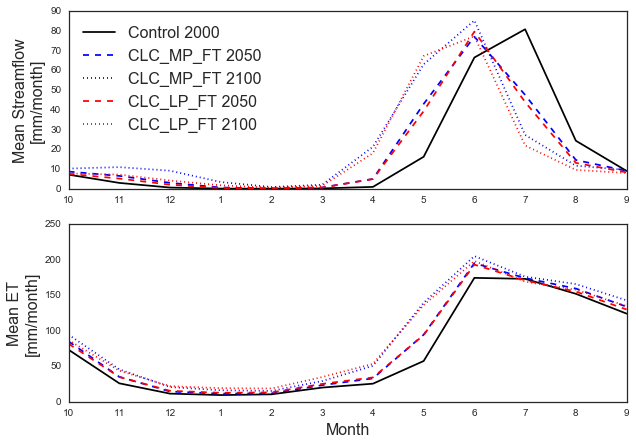

In [49]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

plt.sca(ax1)
dat.loc[dat.decade==0].groupby(by='month').mean()['sf'].plot(c='k',ax=ax1,ls='-',label='Control 2000')

# more P
dat.loc[(dat.decade==5) & (dat.name == 'CLC_MP_FT')].groupby(by='month').mean()['sf'].plot(c='b',ax=ax1,ls='--',label='CLC_MP_FT 2050')
dat.loc[(dat.decade==10) & (dat.name == 'CLC_MP_FT')].groupby(by='month').mean()['sf'].plot(c='b',ax=ax1,ls=':',label='CLC_MP_FT 2100')

# less P
dat.loc[(dat.decade==5) & (dat.name == 'CLC_LP_FT')].groupby(by='month').mean()['sf'].plot(c='r',ax=ax1,ls='--',label='CLC_LP_FT 2050')
dat.loc[(dat.decade==10) & (dat.name == 'CLC_LP_FT')].groupby(by='month').mean()['sf'].plot(c='r',ax=ax1,ls=':',label='CLC_LP_FT 2100')

plt.legend(loc='upper left',ncol=1, fontsize=16)
plt.xlabel('', fontsize = 16)
plt.ylabel('Mean Streamflow\n[mm/month]', fontsize = 16)
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0);

plt.sca(ax2)
dat.loc[dat.decade==0].groupby(by='month').mean()['et'].plot(c='k',ax=ax2,ls='-',label='Control 2000')

# more P
dat.loc[(dat.decade==5) & (dat.name == 'CLC_MP_FT')].groupby(by='month').mean()['et'].plot(c='b',ax=ax2,ls='--',label='CLC_MP_FT 2050')
dat.loc[(dat.decade==10) & (dat.name == 'CLC_MP_FT')].groupby(by='month').mean()['et'].plot(c='b',ax=ax2,ls=':',label='CLC_MP_FT 2100')

# less P
dat.loc[(dat.decade==5) & (dat.name == 'CLC_LP_FT')].groupby(by='month').mean()['et'].plot(c='r',ax=ax2,ls='--',label='CLC_LP_FT 2050')
dat.loc[(dat.decade==10) & (dat.name == 'CLC_LP_FT')].groupby(by='month').mean()['et'].plot(c='r',ax=ax2,ls=':',label='CLC_LP_FT 2100')

plt.xlabel('Month', fontsize = 16)
plt.ylabel('Mean ET\n[mm/month]', fontsize = 16)
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0);
printfig = True
if printfig: plt.savefig('./figures/CLC_Precip_airTemp_change.png',dpi=300,bbox_inches='tight')
if printfig: plt.savefig('./figures/CLC_Precip_airTemp_change.pdf',bbox_inches='tight')
printfig = False

In [47]:
sf_mp = make_table('sf','CLC','MP','FT')
sf_lp = make_table('sf','CLC','LP','FT')
et_mp = make_table('et','CLC','MP','FT')
et_lp = make_table('et','CLC','LP','FT')

In [48]:
et_mp.filter(regex='delta*').sum()

delta_CLC_MP_FT_2050    113.897107
delta_CLC_MP_FT_2100    244.220277
dtype: float64

## Current Land Cover, Current Precipitation, Future Temperature

In [433]:
p = df.loc[df.name=='CLC_CP_FT']
tmp = pd.concat([cont,p])
tmp.reset_index(inplace=True)

In [434]:
dat = pd.DataFrame()
for i in range(len(tmp)):
    out = pd.DataFrame()
    
    # populate the DF
    out['sf'] = tmp.streamflow[i]
    out['et'] = tmp.et[i]
    out['precip'] = tmp.precip[i]
    out['leakage'] = tmp.leakage[i]
    out['trans'] = tmp.trans[i]
    out['evap'] = tmp.evap[i]
    
    # resample the data frame to monthly
    out.index = pd.DatetimeIndex(dates)
    out = out.resample('M').sum()
    out['month'] = out.index.map(get_mowy)
    
    # add the ID variables
    out['name'] = tmp.name[i]
    out['year'] = tmp.year[i]
    out['decade'] = tmp.decade[i]
    out['track'] = tmp.track[i]
    out['scenario'] = tmp.scenario[i]
    
    dat = pd.concat([dat,out])

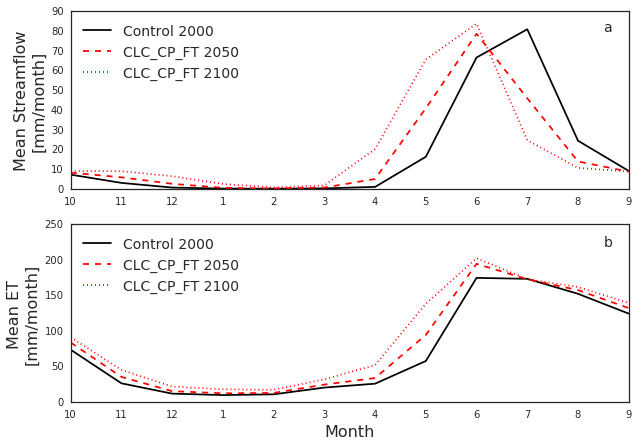

In [435]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
plt.sca(ax1)
dat.loc[dat.decade==0].groupby(by='month').mean()['sf'].plot(c='k',ls='-',label='Control 2000',ax=ax1)
dat.loc[(dat.decade==5) & (dat.name == 'CLC_CP_FT')].groupby(by='month').mean()['sf'].plot(c='r',ls='--',label='CLC_CP_FT 2050',ax=ax1)
dat.loc[(dat.decade==10) & (dat.name == 'CLC_CP_FT')].groupby(by='month').mean()['sf'].plot(c='r',ls=':',label='CLC_CP_FT 2100',ax=ax1)
plt.legend(loc='upper left', fontsize = 14)
plt.xlabel('', fontsize = 16)
plt.ylabel('Mean Streamflow\n[mm/month]', fontsize = 16)
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0);
plt.text(11.5,80,'a',fontsize=14)

plt.sca(ax2)
dat.loc[dat.decade==0].groupby(by='month').mean()['et'].plot(c='k',ls='-',label='Control 2000',ax=ax2)
dat.loc[(dat.decade==5) & (dat.name == 'CLC_CP_FT')].groupby(by='month').mean()['et'].plot(c='r',ls='--',label='CLC_CP_FT 2050',ax=ax2)
dat.loc[(dat.decade==10) & (dat.name == 'CLC_CP_FT')].groupby(by='month').mean()['et'].plot(c='r',ls=':',label='CLC_CP_FT 2100',ax=ax2)
plt.legend(loc='upper left', fontsize = 14)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Mean ET\n[mm/month]', fontsize = 16)
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0);
plt.text(11.5,220,'b',fontsize=14)

if printfig: plt.savefig('./figures/CLC_temp_change.png',dpi=300,bbox_inches='tight')
if printfig: plt.savefig('./figures/CLC_temp_change.pdf',bbox_inches='tight')

In [301]:
sf = make_table('sf','CLC','CP','FT')
et = make_table('et','CLC','CP','FT')
precip = make_table('precip','CLC','CP','FT')
leakage = make_table('leakage','CLC','CP','FT')
trans = make_table('trans','CLC','CP','FT')
evap = make_table('evap','CLC','CP','FT')

In [290]:
sf.filter(regex='delta*').sum().round(1)

delta_CLC_CP_FT_2050   -10.2
delta_CLC_CP_FT_2100    21.8
dtype: float64

In [293]:
et.filter(regex='delta*').sum().round(1)

delta_CLC_CP_FT_2050     -4.9
delta_CLC_CP_FT_2100    118.0
dtype: float64

In [297]:
precip.filter(regex='delta*').sum().round(1)

delta_CLC_CP_FT_2050   -0.0
delta_CLC_CP_FT_2100   -0.0
dtype: float64

In [298]:
leakage.filter(regex='delta*').sum().round(1)

delta_CLC_CP_FT_2050     9.0
delta_CLC_CP_FT_2100   -96.5
dtype: float64

In [305]:
trans.filter(regex='delta*')

,delta_CLC_CP_FT_2050,delta_CLC_CP_FT_2100
month,,
1,0.872674,10.123525
2,-0.560993,8.837521
3,-0.656971,2.789218
4,-0.637755,2.362562
5,-0.400201,1.528322
6,-0.855941,4.125000
7,-3.510044,12.894899
8,-3.850447,47.010800
9,5.146035,13.339741


In [303]:
trans.filter(regex='delta*').sum().round(1)

delta_CLC_CP_FT_2050     -4.3
delta_CLC_CP_FT_2100    117.4
dtype: float64

In [302]:
evap.filter(regex='delta*').sum().round(1)

delta_CLC_CP_FT_2050   -0.6
delta_CLC_CP_FT_2100    0.6
dtype: float64

In [241]:
et = make_table('et')

In [242]:
et.sum()

Control             973.820805
CLC_CP_FT_2050      965.804232
CLC_CP_FT_2100     1088.674140
delta_FT_2050        -8.016573
percent_FT_2050     -39.667621
delta_FT_2100       114.853335
percent_FT_2100     248.166251
dtype: float64

In [244]:
et

,Control,CLC_CP_FT_2050,CLC_CP_FT_2100,delta_FT_2050,percent_FT_2050,delta_FT_2100,percent_FT_2100
month,,,,,,,
1,82.806680,83.415244,90.948047,0.608564,0.734921,8.141367,9.831776
2,35.586848,35.049059,44.908199,-0.537789,-1.511202,9.321351,26.193246
3,16.096464,14.967306,21.435405,-1.129158,-7.014944,5.338941,33.168408
4,13.127597,11.981318,17.615976,-1.146279,-8.731825,4.488379,34.190408
5,13.386144,12.496081,16.892543,-0.890063,-6.649140,3.506399,26.194238
6,25.431643,24.236598,31.566223,-1.195046,-4.699050,6.134580,24.121838
7,37.246700,33.487576,51.728753,-3.759124,-10.092503,14.482053,38.881440
8,97.636320,94.177139,137.914725,-3.459181,-3.542924,40.278405,41.253506
9,190.742005,194.250620,202.240362,3.508615,1.839456,11.498357,6.028225


## Make a table of changes at 2050 and 2100

In [79]:
names = df.name.unique()[1:]

In [80]:
tmp = cont.copy()

for name in names:
    tmp = pd.concat([tmp,df.loc[(df.name==name) & (df.decade==5) | (df.decade==10)]])

tmp.reset_index(inplace=True)

In [81]:
dat = pd.DataFrame()
for i in range(len(tmp)):
    out = pd.DataFrame()
    
    # populate the DF
    out['sf'] = tmp.streamflow[i]
    out['et'] = tmp.et[i]
    out['precip'] = tmp.precip[i]
    out['leak'] = tmp.leakage[i]
    
    # resample the data frame to monthly
    out.index = pd.DatetimeIndex(dates)
    out = out.resample('M').sum()
    out['month'] = out.index.map(get_mowy)
    
    # add the ID variables
    out['name'] = tmp.name[i]
    out['year'] = tmp.year[i]
    out['decade'] = tmp.decade[i]
    out['track'] = tmp.track[i]
    out['scenario'] = tmp.scenario[i]
    
    dat = pd.concat([dat,out])

In [85]:
def make_table(var,lc,precip,temp):
    '''
    var - variable of interest
    lc - land cover specification
    precip - precipitation specification
    temp - temperature specification'''
    table = pd.DataFrame()
    decades = dat.loc[dat.name=='%s_%s_%s'%(lc,precip,temp)].decade.unique()
    table['Control'] = dat.loc[(dat.year==2000) & (dat.name == 'CLC_CP_CT')].groupby('month').mean()[var]
    for decade in decades:
        #make year
        year = (decade*10) + 2000
        
        # pull the data into the data frame
        table['%s_%s_%s_%s'%(lc,precip,temp,year)] = dat.loc[(dat.name=='%s_%s_%s'%(lc,precip,temp)) & (dat.decade==decade)].groupby('month').mean()[var]
        
        # compute changes
        table['delta_%s_%s_%s_%s'%(lc,precip,temp,year)] = table['%s_%s_%s_%s'%(lc,precip,temp,year)]-table['Control']
        table['percent_%s_%s_%s_%s'%(lc,precip,temp,year)] = (table['delta_%s_%s_%s_%s'%(lc,precip,temp,year)]/table['Control'])*100.

    #del table['Control']; del table['FLC_LP_FT_2050']; del table['FLC_MP_FT_2050'];
    #del table['FLC
    return table

In [91]:
dat.loc[(dat.name=='CLC_CP_CT')].groupby('month').mean()['sf'].sum()

208.88104907547088

In [98]:
# run through each name and pull out the difference from control
var = 'et'
tabs = []
for name in names:
    lc = name.split('_')[0]
    precip = name.split('_')[1]
    temp = name.split('_')[2]
        
    tabs.append(make_table(var,lc,precip,temp).filter(regex='delta*').sum().round(2).sort_index())

l2050 = []
l2100 = []
for tab in tabs:
    l2050.append(tab[0])
    l2100.append(tab[1])

table = pd.DataFrame({'2050':l2050,'2100':l2100},index=names)

# for percents
(table/dat.loc[(dat.name=='CLC_CP_CT')].groupby('month').mean()['et'].sum()).round(2)*100.

# for differences from control in mm
#table

,2050,2100
FLC_LP_FT,-1.0,-1.0
FLC_MP_FT,-1.0,-1.0
CLC_LP_CT,-0.0,-1.0
CLC_MP_CT,1.0,1.0
CLC_CP_FT,13.0,27.0
CLC_MP_FT,13.0,28.0
CLC_LP_FT,12.0,25.0


In [402]:
# run through each name and pull out the difference from control
var = 'et'
tabs = []
for name in names:
    lc = name.split('_')[0]
    precip = name.split('_')[1]
    temp = name.split('_')[2]
        
    tabs.append(make_table(var,lc,precip,temp).filter(regex='delta*').sum().round(1).sort_index())

In [403]:
l2050 = []
l2100 = []
for tab in tabs:
    l2050.append(tab[0])
    l2100.append(tab[1])

In [404]:
table = pd.DataFrame({'2050':l2050,'2100':l2100},index=names)

In [405]:
table

,2050,2100
FLC_LP_FT,-129.4,-131.7
FLC_MP_FT,-130.5,-126.6
CLC_LP_CT,-125.6,-129.4
CLC_MP_CT,-117.0,-113.3
CLC_CP_FT,-13.2,109.6
CLC_MP_FT,-18.4,96.1
CLC_LP_FT,-18.4,96.1


## Compare increasing temperature to coupled land cover change

In [249]:
c = df.loc[df.name=='CLC_CP_FT']
mp = df.loc[df.name=='FLC_MP_FT']
lp = df.loc[df.name=='FLC_LP_FT']
tmp = pd.concat([c,mp,lp])
tmp.reset_index(inplace=True)

In [250]:
dat = pd.DataFrame()
for i in range(len(tmp)):
    out = pd.DataFrame()
    
    # populate the DF
    out['sf'] = tmp.streamflow[i]
    out['et'] = tmp.et[i]
    
    # resample the data frame to monthly
    out.index = pd.DatetimeIndex(dates)
    out = out.resample('M').sum()
    out['month'] = out.index.map(get_mowy)
    
    # add the ID variables
    out['name'] = tmp.name[i]
    out['year'] = tmp.year[i]
    out['decade'] = tmp.decade[i]
    out['track'] = tmp.track[i]
    out['scenario'] = tmp.scenario[i]
    
    dat = pd.concat([dat,out])

In [259]:
def make_table(var):
    table = pd.DataFrame()
    table['CLC_CP_FT_2050'] = dat.loc[(dat.decade==5) & (dat.name=='CLC_CP_FT')].groupby('month').mean()[var]
    table['CLC_CP_FT_2100'] = dat.loc[(dat.decade==10) & (dat.name=='CLC_CP_FT')].groupby('month').mean()[var]
    table['FLC_LP_FT_2050'] = dat.loc[(dat.name=='FLC_LP_FT') & (dat.decade==5)].groupby('month').mean()[var]
    table['FLC_MP_FT_2050'] = dat.loc[(dat.name=='FLC_MP_FT') & (dat.decade==5)].groupby('month').mean()[var]
    table['FLC_LP_FT_2100'] = dat.loc[(dat.name=='FLC_LP_FT') & (dat.decade==10)].groupby('month').mean()[var]
    table['FLC_MP_FT_2100'] = dat.loc[(dat.name=='FLC_MP_FT') & (dat.decade==10)].groupby('month').mean()[var]

    table['delta_MP_2050'] = table.FLC_MP_FT_2050-table.CLC_CP_FT_2050
    table['delta_LP_2050'] = table.FLC_LP_FT_2050-table.CLC_CP_FT_2050
    table['percent_MP_2050'] = (table.delta_MP_2050/table.CLC_CP_FT_2050)*100.
    table['percent_LP_2050'] = (table.delta_LP_2050/table.CLC_CP_FT_2050)*100.

    table['delta_MP_2100'] = table.FLC_MP_FT_2100-table.CLC_CP_FT_2100
    table['delta_LP_2100'] = table.FLC_LP_FT_2100-table.CLC_CP_FT_2100
    table['percent_MP_2100'] = (table.delta_MP_2100/table.CLC_CP_FT_2100)*100.
    table['percent_LP_2100'] = (table.delta_LP_2100/table.CLC_CP_FT_2100)*100.

    del table['FLC_LP_FT_2050']; del table['FLC_MP_FT_2050'];
    del table['FLC_LP_FT_2100']; del table['FLC_MP_FT_2100'];
    return table

In [260]:
sf = make_table('sf')
et = make_table('et')

In [261]:
sf.sum()

CLC_CP_FT_2050      210.256610
CLC_CP_FT_2100      242.271116
delta_MP_2050        10.604912
delta_LP_2050         0.899271
percent_MP_2050     202.244273
percent_LP_2050     151.842952
delta_MP_2100        58.067926
delta_LP_2100        27.880454
percent_MP_2100    1233.546714
percent_LP_2100     712.585101
dtype: float64

In [258]:
et.sum()

delta_MP_2050     -117.228516
delta_LP_2050     -116.150383
percent_MP_2050   -116.694876
percent_LP_2050    -82.508162
delta_MP_2100     -236.248695
delta_LP_2100     -241.295456
percent_MP_2100   -266.505401
percent_LP_2100   -219.677131
dtype: float64

In [ ]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
plt.sca(ax1)
dat.loc[(dat.decade==5) & (dat.name == 'CLC_CP_FT')].groupby(by='month').mean()['sf'].plot(c='k',ls='-',label='Control 2000',ax=ax1)

dat.loc[(dat.decade==5) & (dat.name == 'FLC_FP_FT')].groupby(by='month').mean()['sf'].plot(c='r',ls='--',label='CLC_CP_FT 2050',ax=ax1)
dat.loc[(dat.decade==10) & (dat.name == 'FLC_FP_FT')].groupby(by='month').mean()['sf'].plot(c='r',ls=':',label='CLC_CP_FT 2100',ax=ax1)
plt.legend(loc='upper left', fontsize = 14)
plt.xlabel('', fontsize = 16)
plt.ylabel('Mean Streamflow\n[mm/month]', fontsize = 16)
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0);
plt.text(11.5,80,'a',fontsize=14)

plt.sca(ax2)
dat.loc[dat.decade==0].groupby(by='month').mean()['et'].plot(c='k',ls='-',label='Control 2000',ax=ax2)
dat.loc[(dat.decade==5) & (dat.name == 'CLC_CP_FT')].groupby(by='month').mean()['et'].plot(c='r',ls='--',label='CLC_CP_FT 2050',ax=ax2)
dat.loc[(dat.decade==10) & (dat.name == 'CLC_CP_FT')].groupby(by='month').mean()['et'].plot(c='r',ls=':',label='CLC_CP_FT 2100',ax=ax2)
plt.legend(loc='upper left', fontsize = 14)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Mean ET\n[mm/month]', fontsize = 16)
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0);
plt.text(11.5,220,'b',fontsize=14)

#plt.savefig('./figures/FLC_vs_temp_change.png',dpi=300,bbox_inches='tight')
#plt.savefig('./figures/FLC_vs_temp_change.pdf',bbox_inches='tight')

## 2050 Land Cover Coupled vs more T and LP and MP

In [113]:
FT = df.loc[(df.name=='CLC_CP_FT') & (df.decade==5)]
MP = df.loc[(df.name=='CLC_MP_CT') & (df.decade==5)]
LP = df.loc[(df.name=='CLC_LP_CT') & (df.decade==5)]
FLC_MP = df.loc[(df.name=='FLC_MP_FT') & (df.decade==5)]
FLC_LP = df.loc[(df.name=='FLC_LP_FT') & (df.decade==5)]

tmp = pd.concat([cont,FT,MP,LP,FLC_MP,FLC_LP])
tmp.reset_index(inplace=True)

In [114]:
dowys = []
names = []
vals = []
decades = []

for i in range(len(tmp)):
    sf = tmp.streamflow[i] # pull out the streamflow array
    for val,d in zip(sf,dowy):
        names.append(tmp.name[i])
        dowys.append(d)
        decades.append(tmp.decade[i])
        vals.append(val)
        
sf = pd.DataFrame({'dowy':dowys,'name':names,'decade':decades,'val':vals})

(0, 4.5)

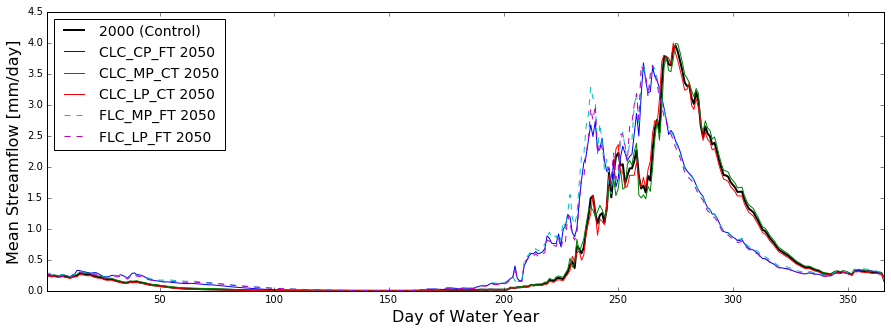

In [115]:
sf.loc[sf.decade==0].groupby(by='dowy').mean()['val'].plot(c='k',ls='-',lw=2 ,figsize=(15,5),label='2000 (Control)')

sf.loc[(sf.decade==5) & (sf.name == 'CLC_CP_FT')].groupby(by='dowy').mean()['val'].plot(label='CLC_CP_FT 2050')
sf.loc[(sf.decade==5) & (sf.name == 'CLC_MP_CT')].groupby(by='dowy').mean()['val'].plot(label='CLC_MP_CT 2050')
sf.loc[(sf.decade==5) & (sf.name == 'CLC_LP_CT')].groupby(by='dowy').mean()['val'].plot(label='CLC_LP_CT 2050')
sf.loc[(sf.decade==5) & (sf.name == 'FLC_MP_FT')].groupby(by='dowy').mean()['val'].plot(label='FLC_MP_FT 2050',ls='--')
sf.loc[(sf.decade==5) & (sf.name == 'FLC_LP_FT')].groupby(by='dowy').mean()['val'].plot(label='FLC_LP_FT 2050',ls='--')

l = plt.legend(loc='upper left', fontsize = 14)
plt.xlabel('Day of Water Year', fontsize = 16)
plt.ylabel('Mean Streamflow [mm/day]', fontsize = 16)
plt.ylim(0,4.5)

## 2100 Land Cover Coupled vs more T and LP and MP

In [107]:
FT = df.loc[(df.name=='CLC_CP_FT') & (df.decade==10)]
MP = df.loc[(df.name=='CLC_MP_CT') & (df.decade==10)]
LP = df.loc[(df.name=='CLC_LP_CT') & (df.decade==10)]
FLC_MP = df.loc[(df.name=='FLC_MP_FT') & (df.decade==10)]
FLC_LP = df.loc[(df.name=='FLC_LP_FT') & (df.decade==10)]

tmp = pd.concat([cont,FT,MP,LP,FLC_MP,FLC_LP])
tmp.reset_index(inplace=True)

In [108]:
dowys = []
names = []
vals = []
decades = []

for i in range(len(tmp)):
    sf = tmp.streamflow[i] # pull out the streamflow array
    for val,d in zip(sf,dowy):
        names.append(tmp.name[i])
        dowys.append(d)
        decades.append(tmp.decade[i])
        vals.append(val)
        
sf = pd.DataFrame({'dowy':dowys,'name':names,'decade':decades,'val':vals})

(0, 4.5)

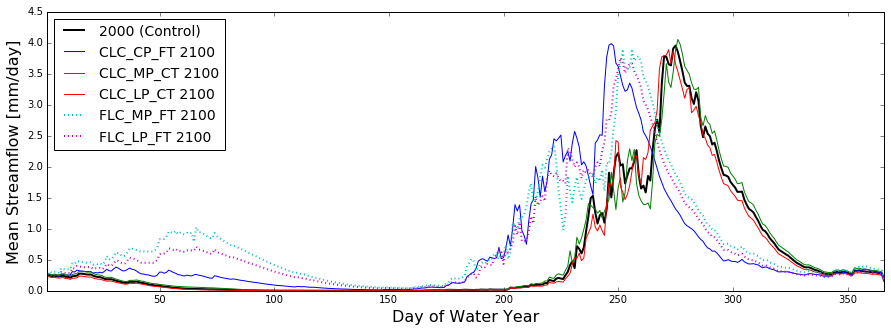

In [112]:
sf.loc[sf.decade==0].groupby(by='dowy').mean()['val'].plot(c='k',ls='-',lw=2 ,figsize=(15,5),label='2000 (Control)')

sf.loc[(sf.decade==10) & (sf.name == 'CLC_CP_FT')].groupby(by='dowy').mean()['val'].plot(label='CLC_CP_FT 2100')
sf.loc[(sf.decade==10) & (sf.name == 'CLC_MP_CT')].groupby(by='dowy').mean()['val'].plot(label='CLC_MP_CT 2100')
sf.loc[(sf.decade==10) & (sf.name == 'CLC_LP_CT')].groupby(by='dowy').mean()['val'].plot(label='CLC_LP_CT 2100')
sf.loc[(sf.decade==10) & (sf.name == 'FLC_MP_FT')].groupby(by='dowy').mean()['val'].plot(label='FLC_MP_FT 2100',ls=':',lw=2)
sf.loc[(sf.decade==10) & (sf.name == 'FLC_LP_FT')].groupby(by='dowy').mean()['val'].plot(label='FLC_LP_FT 2100',ls=':',lw=2)

l = plt.legend(loc='upper left', fontsize = 14)
plt.xlabel('Day of Water Year', fontsize = 16)
plt.ylabel('Mean Streamflow [mm/day]', fontsize = 16)
plt.ylim(0,4.5)